# **Notebook Created by : Priyanka Diddi**

# Prediction using Supervised ML :  Students Performance Prediction 

## 1. Business Problem

### 1.1 Description
Nowadays, people are using machine learning in education field also to automate most of the things in return it reduces **man power , saves time**.

In classroom,there are many students and mostly one teacher has to work on students progress so its not always possible to interact with each student and know their progress.

Before the final exam,every teacher would like to know their students progress, percentage of marks will secure by his/her students in upcoming exams so that they can work more on weaker students.




### 1.2 Problem Statement
Here challenge is to predict the percentage of marks of an student based on the number of study hours. 

### 1.3 Source / useful links

This problem statement and data given by **The Sparks Foundation**.

link : http://bit.ly/w-data

### 1.4 Real World / Business Objectives and Constraints



1) Here **objective** is to predict percentage of student based to some data like number of study hours.

2) No strict latency constraints.

## 2. Machine Learning problem

## 2.1 Data
### 2.1.1 Data Overview

The given data contains 25 records.

Size of dataset is 1KB

### Data Field Explaination

Hours	: Number of study hours per day


Scores : Predicted percentage of student

### 2.1.2 Example Data point

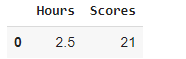

## 2.2 Mapping the real-world problem to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem

In this problem,prediction is percentage of marks will secure by student so it is clearly a regression problem.

### 2.2.2 Performance metric



Root Mean Square Error(RMSE):
Root mean squared error (RMSE) is the square root of the mean of the square of all of the error.

## 3. Exploratory Data Analysis

### 3.1 Data Loading

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/content/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the distribution of scores

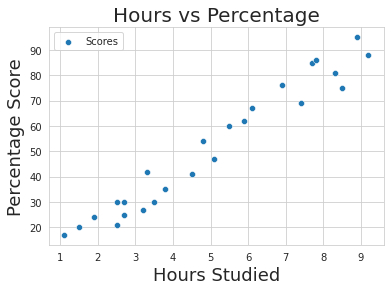

In [5]:
sns.set_style("whitegrid")
sns.scatterplot(data=data,x='Hours',y='Scores',label='Scores')
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied',size=18)  
plt.ylabel('Percentage Score',size=18)  
plt.show()

**Observation**: From the graph above, It is clear that there is a positive linear relation between the number of hours studied and percentage of score.

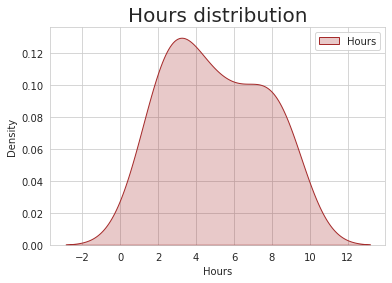

Average study hours of students:  5.012


In [6]:
res = sns.kdeplot(data['Hours'],color='brown',shade=True,label='Hours')
plt.title('Hours distribution',size=20)  
plt.legend()
plt.show()
print("Average study hours of students: ",data['Hours'].mean())

Observation: 

1)Average of hours studied by students is 5 hours.

2) Majority of students have studied from 2 to 8 hours.

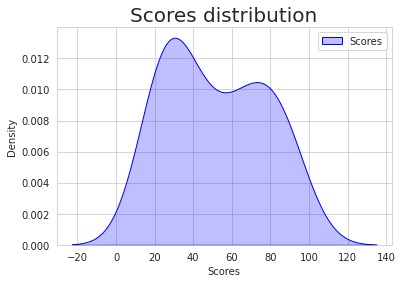

Average Scores of students:  51.48


In [7]:
res = sns.kdeplot(data['Scores'],color='blue',shade=True,label='Scores')
plt.title('Scores distribution',size=20)  
plt.legend()
plt.show()
print("Average Scores of students: ",data['Scores'].mean())

Observation: 

1)Average score of students is 51%.

2) Majority of students secured 20-80%.



### Split the data into train and test datasets

In [8]:
y=data['Scores']
x=data.drop(['Scores'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

print("Shape of train data:",X_train.shape[0])
print("Shape of test data:",X_test.shape[0])

Shape of train data: 17
Shape of test data: 8


In [9]:
model = LinearRegression()

# fit the model with the training data
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

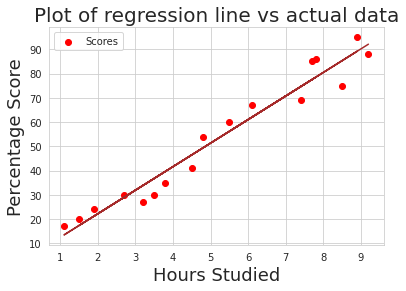

In [10]:
# Plotting the regression line
line = model.coef_*X_train+model.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train,label='Scores',color='red')
plt.title('Plot of regression line vs actual data',size=20)  
plt.xlabel('Hours Studied',size=18)  
plt.ylabel('Percentage Score',size=18)  
plt.legend()
plt.plot(X_train, line,color='brown')
plt.show()

## Model Prediction 

In [11]:
# Prediction on train datapoints
train_pred = model.predict(X_train) 

# calculate Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,train_pred)**(0.5)
print('RMSE on train dataset : ', rmse_train)

RMSE on train dataset :  5.603419312826166


In [14]:
# Prediction on test datapoint
test_pred = model.predict(X_test) 

#calculate Root Mean Squared Error on test datapoint
rmse_test = mean_squared_error(y_test,test_pred)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  4.859985351228103


**Observation**: There is small difference between RMSE of train and test sets, it shows the model is good fitted on data.

###Q. What will be the predicted score if a student studies for 9.25 hrs/day?

In [13]:
hours = [[9.25]]
pred = model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.61670033840096


## Conclusion

1) After training the model,when regression line is plotted by showing the model is good fit where the difference between actual and predicted value is less.

2) After checking RMSE of both the sets,one can say that model is sensible where we only trained on 17 datapoints and if we train the model on large dataset then there is high chance of getting very acurate results.